In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
plt.style.use('fivethirtyeight')

In [2]:
df_jobs=pd.read_csv('Monster_LA_Nursing_assistant_Scraped_Data_18_26_11_12_2018.csv')
df_jobs_1=pd.read_csv('Monster_Sacramento_Nursing_assistant_Scraped_Data_13_58_11_11_2018.csv')
df_jobs_2=pd.read_csv('Monster_SD_Nursing_assistant_Scraped_Data_01_42_11_11_2018.csv')
df_jobs_3=pd.read_csv('Monster_SF_Nursing_assistant_Scraped_Data_17_03_11_11_2018.csv')
df_jobs_4=pd.read_csv('Monster_Fresno_Nursing_assistant_Scraped_Data_21_22_11_11_2018.csv')

In [3]:
df_jobs_1.drop(df_jobs_1.columns[0],axis=1,inplace=True)
df_jobs_1.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_2.drop(df_jobs_2.columns[0],axis=1,inplace=True)
df_jobs_2.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_3.drop(df_jobs_3.columns[0],axis=1,inplace=True)
df_jobs_3.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_4.drop(df_jobs_4.columns[0],axis=1,inplace=True)
df_jobs_4.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs.drop(df_jobs.columns[0],axis=1,inplace=True)
df_jobs.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [4]:
df_jobs_1 = df_jobs_1[df_jobs_1['Job_name']!='Error loading']
df_jobs_2 = df_jobs_2[df_jobs_2['Job_name']!='Error loading']
df_jobs_3 = df_jobs_3[df_jobs_3['Job_name']!='Error loading']
df_jobs_4 = df_jobs_4[df_jobs_4['Job_name']!='Error loading']
df_jobs = df_jobs[df_jobs['Job_name']!='Error loading']

In [5]:
df_jobs=df_jobs.append(df_jobs_1)
df_jobs=df_jobs.append(df_jobs_2)
df_jobs=df_jobs.append(df_jobs_3)
df_jobs=df_jobs.append(df_jobs_4)

In [6]:
#job titles word clouds
#generating positive reviews word cloud
Job_title_words = ' '.join(str(jt) for jt in df_jobs['Job_name'])

In [7]:
more_stopwords = {'Los Angeles', '91D', 'Angeles', 'Santa', 'Los', 'Hollywood', 'Anaheim', 'Monica', 'Needed', 'LAX',
                 'United', 'Relocation', 'Residential', 'Site', 'company', 'luxury', 'Openings', 'Custom', 'Immediate', 'High', 
                  'Mig', 'Guitar', 'Now', 'Amazing', 'Top', 'End', 'San', 'Shift', 'CA' , 'Fe','LA','Mixed','Jose', 'Hiring', 
                  'Pick', 'Shifts', 'Flexible', 'Wanted', 'Time', 'Looking', 'Bonus', 'diem'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

In [9]:
# remove URLs and words that start with @
Job_title_cleaned_tags = " ".join([word for word in Job_title_words.split()
                            ])

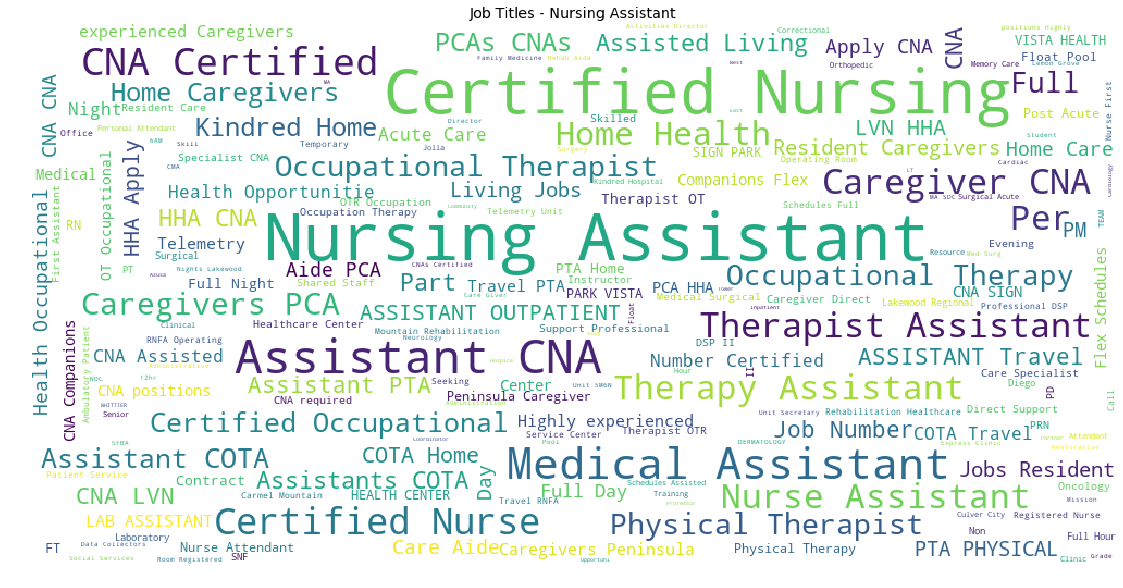

<Figure size 432x288 with 0 Axes>

In [10]:
wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_title_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.title('Job Titles - Nursing Assistant')
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_job_titles_nursing_assistant.png', bbox_inches='tight')

In [11]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
#job titles word clouds
#generating positive reviews word cloud
Job_desc_words = ' '.join(porter.stem(str(jd)) for jd in df_jobs['Job_description'])

for word in Job_desc_words:
    re.sub(r'[^\w\s]','',word)

In [22]:
more_stopwords = {'sexual orientation', 'contract', 'bachelor', 'degree', 'necessary', 'religion' , 'color', 'looking', 'applicants', 
                  'required', 'use', 'responsibilities', 'experience', 'dental', 'vision', 'orientation', 'sexual', 'California'
                  'opportunities', 'Equal', 'opportunity', 'customer', 'work', 'project', 'including', 'requirement', 'will',
                  'projects', 'position', 'subcontractor', 'gender', 'identity', 'school', 'diploma', 'good', 'largest',
                  'job', 'description', 'asked', 'criminal', 'history', 'hiring', 'answer', 'apply', 'race,',
                  'color,', 'religion,', 'sex', 'andor', 'positions', 'bay', 'paid', 'bonus', 'call', 'staff', 'agency',
                  'referral', 'hires', 'pay', 'must', 'jobs', 'scripps', 'full', 'compensation', 'offer', 'part',
                  'benefits', 'minimum', 'love', 'why', 'deposit', 'fastest', 'employee', '5x', 'direct', 'overtime', 'holiday',
                  'eligibility', 'time', 'more', '1418hour', 'youd', 'best', "thats", '15X', 'us', 'better', 'year'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)


In [23]:
# remove URLs and words that start with @
Job_desc_cleaned_tags = " ".join([word for word in Job_desc_words.split()
                            ])

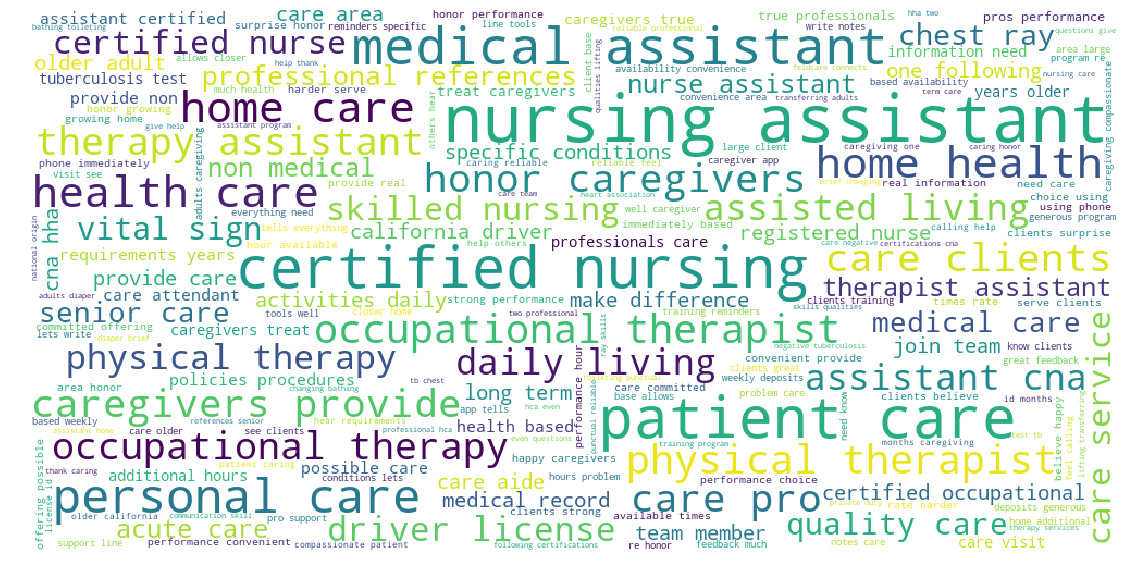

<Figure size 432x288 with 0 Axes>

In [24]:
wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_desc_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_nursing_job_desc.png', bbox_inches='tight')

In [25]:
import nltk
from nltk import FreqDist

In [26]:
Job_desc_stopwords_cleaned = " ".join([word for word in Job_desc_words.split() if word.lower() not in STOPWORDS and len(word)>3
                            ])
    
Job_desc_stopwords_punc_cleaned = " ".join([re.sub(r'[^\w\s]','',word) for word in Job_desc_stopwords_cleaned.split() if word not in STOPWORDS
                                             and len(word)>3
                            ])

In [27]:
fdist2= FreqDist(nltk.ngrams(Job_desc_stopwords_punc_cleaned.split(),2))

In [28]:
with open("bigrams_skills_raw_data_nursing_assistants.csv", "w") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(fdist2.most_common(300))

In [33]:
df_bigrams=pd.read_csv('bigrams_nursing_assistant_cleaned_labeled_manually.csv')

df_hardskills = df_bigrams[df_bigrams['Label']=='Hard skill']

df_hardskills.reset_index(inplace=True)

df_hardskills.drop(df_hardskills.columns[0],axis=1,inplace=True)

df_hardskills.drop(df_hardskills.columns[2],axis=1,inplace=True)

C:\Users\Adrianna\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
word_dict={}

word_dict=pd.Series(df_hardskills.Frequency.values,index=df_hardskills.Bigram).to_dict()

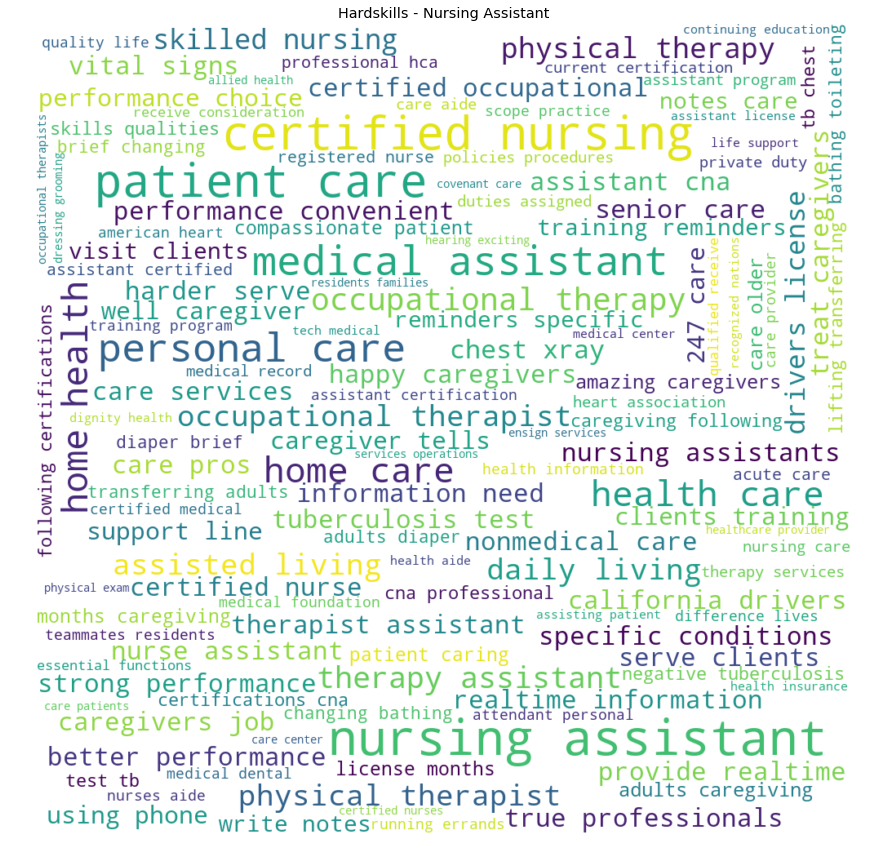

In [35]:
wordCloud = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud.generate_from_frequencies(word_dict)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Hardskills - Nursing Assistant')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Nursing_job_hardskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")